# Pymaceuticals Inc.
---

### Analysis and Observations

1) Based on the box plots for the final tumor volumes by drug regimen, both Capomulin and Ramicane are significantly better at reducing tumor size than Infubinol or Ceftamine.

2) There is a positive correlation between mouse weight and average tumor volume. As the mouse weight increases, the average tumor volume increases, implying that the drugs impact lessens as the mouse weight increases. 

3) From calculating the outliers and the box plot, the results of the study are consistent with only 1 outlier in the data set for Infubinol.




 

In [1]:
%matplotlib inline

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# Mouse Data has Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)
# Study Results has Mouse ID, Timepoint, Tumor Volume (mm3), and Metastatic Sites
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_results.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
no_of_mice = combined_results["Mouse ID"].nunique()
no_of_mice

249

In [5]:
# Check for any mouse ID with duplicate time points
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseID = combined_results[combined_results.duplicated(["Mouse ID", "Timepoint"])]
dupe_ID = duplicateMouseID["Mouse ID"].unique()
dupe_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_rows = combined_results[combined_results["Mouse ID"].isin(dupe_ID)]
dupe_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Need to figure out how to use the results from the Dupe ID
clean_combined = combined_results.loc[combined_results["Mouse ID"].isin(dupe_ID)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
no_of_mice = clean_combined["Mouse ID"].nunique()
no_of_mice

248

## Summary Statistics

In [9]:
# Use the clean data frame for the Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_combined["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_vol = clean_combined.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_vol = clean_combined.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = clean_combined.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tumor_vol = clean_combined.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_combined.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
stats_by_drug = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                                "Median Tumor Volume": med_tumor_vol,
                                "Tumor Volume Variance": var_tumor_vol,
                                "Tumor Volume Std. Dev.": stdev_tumor_vol,
                                "Tumor Volume Std. Err.": sem_tumor_vol})
stats_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_by_drug = clean_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_by_drug

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

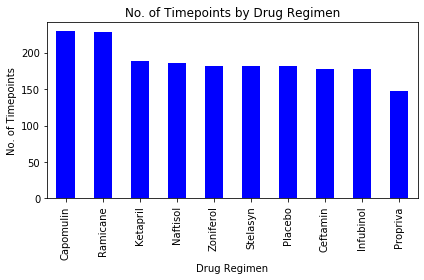

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_drug = clean_combined["Drug Regimen"].value_counts()
timepoints_by_drug.plot(kind="bar", facecolor="blue")

# Set x/y labels and title
plt.title("No. of Timepoints by Drug Regimen")
plt.ylabel("No. of Timepoints")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()



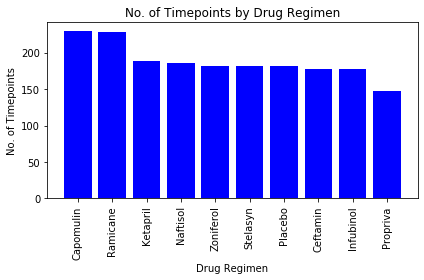

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x axis / data set
x_axis = clean_combined["Drug Regimen"].value_counts()

#plot the bar chart
plt.bar(x_axis.index.values, x_axis.values, facecolor="blue", alpha=1, align="center")

# Set x/y labels, title, ticks
plt.title("No. of Timepoints by Drug Regimen")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints")

plt.tight_layout()
plt.show()



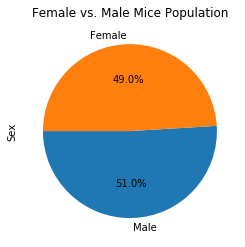

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = clean_combined["Sex"].value_counts()
sex_mice.plot(kind="pie", figsize=(8,4), startangle=180, autopct="%1.1f%%")
plt.title("Female vs. Male Mice Population")
plt.show()


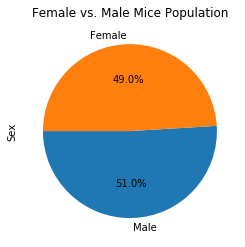

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_mice, labels=["Male","Female"], autopct="%1.1f%%", startangle=180)
plt.title("Female vs. Male Mice Population")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse        
per_mouse = clean_combined.groupby(["Mouse ID"]).max()
per_mouse_reset = per_mouse.reset_index()

merged_data = per_mouse_reset[["Mouse ID","Timepoint"]].\
    merge(clean_combined,on=["Mouse ID","Timepoint"],how="left")

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treament in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treament, "Tumor Volume (mm3)"]
    
    # add subset to use for the box plot
    tumor_vol_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_volume.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)] 
    outliers_count = outliers.count()


    print(f"{treament}'s tumor volume(mm3) potential outliers: below {round(lower_bound,2)} and above {round(upper_bound,2)}.")
    print(f"{treament}'s IQR is {iqr} and it has {outliers_count} no. of outliers")
    print("------------------------------------------------------------------")



Capomulin's tumor volume(mm3) potential outliers: below 20.7 and above 51.83.
Capomulin's IQR is 7.781863460000004 and it has 0 no. of outliers
------------------------------------------------------------------
Ramicane's tumor volume(mm3) potential outliers: below 17.91 and above 54.31.
Ramicane's IQR is 9.098536719999998 and it has 0 no. of outliers
------------------------------------------------------------------
Infubinol's tumor volume(mm3) potential outliers: below 36.83 and above 82.74.
Infubinol's IQR is 11.477135160000003 and it has 1 no. of outliers
------------------------------------------------------------------
Ceftamin's tumor volume(mm3) potential outliers: below 25.36 and above 87.67.
Ceftamin's IQR is 15.577752179999997 and it has 0 no. of outliers
------------------------------------------------------------------


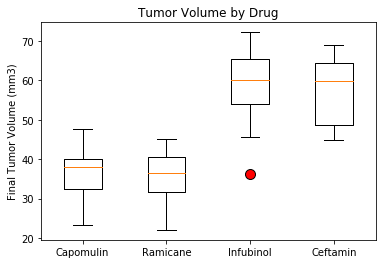

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot(tumor_vol_list,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= outlier_dot)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug")

plt.show()


## Line and Scatter Plots

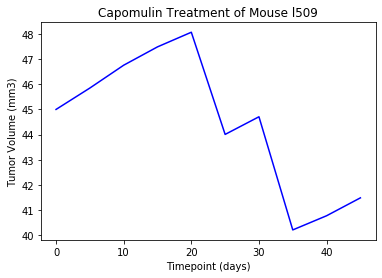

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Generate dataframe only in Capomulin Regimen
Capomulin_df = clean_combined.loc[clean_combined['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
# As per graph shown on the starter file, using Mouse ID l509 
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color='blue')

# Set x/y labels and title
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



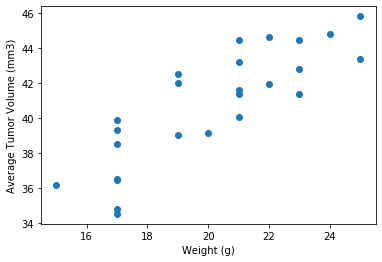

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

# Generate scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()




## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


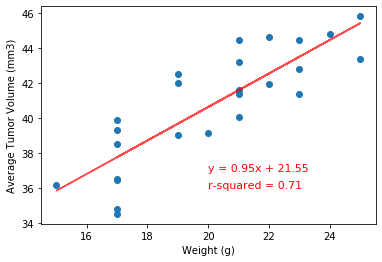

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
#print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Set x/y labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


